<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%202%20-%20Exercise%20-%20Answer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BBC CSV file : label = topics, sentence = content
# Classification

In [2]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv \
    -O /tmp/bbc-text.csv

--2020-09-15 16:11:46--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.28.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.28.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [application/octet-stream]
Saving to: ‘/tmp/bbc-text.csv’

/tmp/bbc-text.csv   100%[===================>]   4.82M  --.-KB/s    in 0.02s   

2020-09-15 16:11:46 (268 MB/s) - ‘/tmp/bbc-text.csv’ saved [5057493/5057493]



In [3]:
vocab_size = 1000
embedding_dim = 18
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_portion = .8

In [4]:
sentences = []
labels = []
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
print(len(stopwords))
# Expected Output
# 153

153


In [5]:
#remove stopwords from sentence
# token = " " + word + " " to adjust to space when word is removed.

with open("/tmp/bbc-text.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        sentence = row[1]
        for word in stopwords:
            token = " " + word + " "
            sentence = sentence.replace(token, " ")
        sentences.append(sentence)

print(len(labels))
print(len(sentences))
print(sentences[0])
print("char count : ",len(sentences[0]))
# Expected Output
# 2225
# 2225
# tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv will radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend  programmes content will delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us s tivo uk s sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take off europe lack high-definition programming. not can people forward wind adverts  can also forget abiding network channel schedules  putting together a-la-carte entertainment. us networks cable satellite companies worried means terms advertising revenues well  brand identity  viewer loyalty channels. although us leads technology moment  also concern raised europe  particularly growing uptake services like sky+.  happens today  will see nine months years  time uk   adam hume  bbc broadcast s futurologist told bbc news website. likes bbc  no issues lost advertising revenue yet. pressing issue moment commercial uk broadcasters  brand loyalty important everyone.  will talking content brands rather network brands   said tim hanlon  brand communications firm starcom mediavest.  reality broadband connections  anybody can producer content.  added:  challenge now hard promote programme much choice.   means  said stacey jolna  senior vice president tv guide tv group  way people find content want watch simplified tv viewers. means networks  us terms  channels take leaf google s book search engine future  instead scheduler help people find want watch. kind channel model might work younger ipod generation used taking control gadgets play them. might not suit everyone  panel recognised. older generations comfortable familiar schedules channel brands know getting. perhaps not want much choice put hands  mr hanlon suggested.  end  kids just diapers pushing buttons already - everything possible available   said mr hanlon.  ultimately  consumer will tell market want.   50 000 new gadgets technologies showcased ces  many enhancing tv-watching experience. high-definition tv sets everywhere many new models lcd (liquid crystal display) tvs launched dvr capability built  instead external boxes. one example launched show humax s 26-inch lcd tv 80-hour tivo dvr dvd recorder. one us s biggest satellite tv companies  directtv  even launched branded dvr show 100-hours recording capability  instant replay  search function. set can pause rewind tv 90 hours. microsoft chief bill gates announced pre-show keynote speech partnership tivo  called tivotogo  means people can play recorded programmes windows pcs mobile devices. reflect increasing trend freeing multimedia people can watch want  want.

2225
2225
tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv will radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend  programmes content will delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us s tivo uk s sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take off europe lack high-definition programming. not can people forward wind adverts  can also forget abiding network channel schedules  putting together a-la-carte entertai

In [6]:
print(labels[0])
print(labels[1])

tech
business


In [7]:
#train - test set split 

train_size = int(len(sentences) * training_portion)

train_sentences = sentences[:train_size]
train_labels = labels[:train_size]

validation_sentences = sentences[train_size:]
validation_labels = labels[train_size:]


In [8]:
#train set preparation
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
#print("word index : ",word_index)

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)

# see truncation in padding
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))



word index :  {'<OOV>': 1, 's': 2, 'said': 3, 'will': 4, 'not': 5, 'mr': 6, 'year': 7, 'also': 8, 'people': 9, 'new': 10, 'us': 11, 'one': 12, 'can': 13, 'last': 14, 't': 15, 'first': 16, 'time': 17, 'two': 18, 'government': 19, 'world': 20, 'now': 21, 'uk': 22, 'best': 23, 'years': 24, 'no': 25, 'make': 26, 'just': 27, 'film': 28, 'told': 29, 'made': 30, 'get': 31, 'music': 32, 'game': 33, 'like': 34, 'back': 35, 'many': 36, '000': 37, 'labour': 38, 'three': 39, 'well': 40, '1': 41, 'next': 42, 'bbc': 43, 'take': 44, 'set': 45, 'number': 46, 'added': 47, 'way': 48, 'market': 49, '2': 50, 'company': 51, 'may': 52, 'says': 53, 'election': 54, 'home': 55, 'off': 56, 'party': 57, 'good': 58, 'going': 59, 'much': 60, 'work': 61, '2004': 62, 'still': 63, 'win': 64, 'show': 65, 'think': 66, 'games': 67, 'go': 68, 'top': 69, 'second': 70, 'won': 71, 'million': 72, '6': 73, 'england': 74, 'firm': 75, 'since': 76, 'week': 77, 'say': 78, 'play': 79, 'part': 80, 'public': 81, 'use': 82, 'blair': 

In [9]:
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length)

print(len(validation_sequences))
print(validation_padded.shape)


445
(445, 120)


In [10]:
#labels are texts, so they need to be tokenized, and represented as a number

label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(train_labels)
label_word_index = label_tokenizer.word_index
print("label word index : ",label_word_index)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

# Expected output
# [4]
# [2]
# [1]
# (1780, 1)
# [5]
# [4]
# [3]
# (445, 1)

label word index :  {'sport': 1, 'business': 2, 'politics': 3, 'entertainment': 4, 'tech': 5}
[5]
[2]
[1]
(1780, 1)
[4]
[5]
[3]
(445, 1)


In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 18)           18000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 18)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                456       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 150       
Total params: 18,606
Trainable params: 18,606
Non-trainable params: 0
_________________________________________________________________


In [12]:
num_epochs = 30
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Epoch 1/30
56/56 - 0s - loss: 1.7442 - accuracy: 0.2169 - val_loss: 1.6945 - val_accuracy: 0.2382
Epoch 2/30
56/56 - 0s - loss: 1.6393 - accuracy: 0.3303 - val_loss: 1.5912 - val_accuracy: 0.4202
Epoch 3/30
56/56 - 0s - loss: 1.5293 - accuracy: 0.4702 - val_loss: 1.4752 - val_accuracy: 0.5528
Epoch 4/30
56/56 - 0s - loss: 1.3768 - accuracy: 0.5983 - val_loss: 1.3004 - val_accuracy: 0.6045
Epoch 5/30
56/56 - 0s - loss: 1.1736 - accuracy: 0.6416 - val_loss: 1.0988 - val_accuracy: 0.7101
Epoch 6/30
56/56 - 0s - loss: 0.9644 - accuracy: 0.7640 - val_loss: 0.9182 - val_accuracy: 0.7798
Epoch 7/30
56/56 - 0s - loss: 0.7861 - accuracy: 0.8478 - val_loss: 0.7687 - val_accuracy: 0.8674
Epoch 8/30
56/56 - 0s - loss: 0.6374 - accuracy: 0.9028 - val_loss: 0.6448 - val_accuracy: 0.8876
Epoch 9/30
56/56 - 0s - loss: 0.5152 - accuracy: 0.9292 - val_loss: 0.5508 - val_accuracy: 0.8944
Epoch 10/30
56/56 - 0s - loss: 0.4190 - accuracy: 0.9444 - val_loss: 0.4732 - val_accuracy: 0.9056
Epoch 11/30
56/56 -

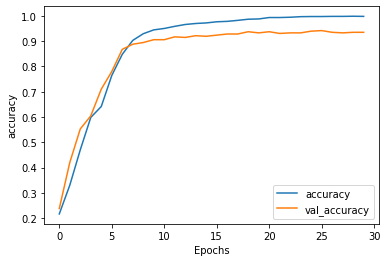

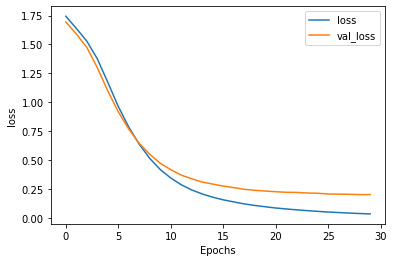

In [13]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [14]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])


In [15]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

# Expected output
# (1000, 16)

(1000, 18)


# Try Testing

In [19]:
testSentence1 = "tigers wary of farrell  gamble  leicester say they will not be rushed into making a bid for andy farrell should the great britain rugby league captain decide to switch codes.   we and anybody else involved in the process are still some way away from going to the next stage   tigers boss john wells told bbc radio leicester.  at the moment  there are still a lot of unknowns about andy farrell  not least his medical situation.  whoever does take him on is going to take a big  big gamble.  farrell  who has had persistent knee problems  had an operation on his knee five weeks ago and is expected to be out for another three months. leicester and saracens are believed to head the list of rugby union clubs interested in signing farrell if he decides to move to the 15-man game.  if he does move across to union  wells believes he would better off playing in the backs  at least initially.  i m sure h"
testSentence2 = "tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much "

In [25]:
testSequence1 = tokenizer.texts_to_sequences([testSentence1])
testPadded1 = pad_sequences(testSequence1, padding=padding_type, maxlen=max_length)

testSequence2 = tokenizer.texts_to_sequences([testSentence2])
testPadded2 = pad_sequences(testSequence2, padding=padding_type, maxlen=max_length)

softmax_result1 = model.predict(testPadded1)
softmax_result2 = model.predict(testPadded2)

def determine_category(resultArray):
  index = np.argmax(resultArray)
  reverse_label_word_index = dict([(value,key) for (key,value) in label_word_index.items()])
  return reverse_label_word_index.get(index,'?')

print("result 1 :",determine_category(softmax_result1))
print("result 2 :",determine_category(softmax_result2))




result 1 : sport
result 2 : tech


In [27]:
#Thanks to the reverse_label_word_index we have utilized in determine_category
reverse_label_word_index = dict([(value,key) for (key,value) in label_word_index.items()])
reverse_label_word_index

{1: 'sport', 2: 'business', 3: 'politics', 4: 'entertainment', 5: 'tech'}

In [ ]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')